In [ ]:
Feature matching (özellik eşleştirme), iki görüntüdeki benzer veya ilgili noktaların eşleştirilmesi
işlemidir. Bu teknik, genellikle görüntülerin karşılaştırılması, nesne tanıma, panorama oluşturma, 
ve görüntü birleştirme gibi bilgisayarla görme projelerinde kullanılır.


Feature Matching Nedir?

Feature matching, iki görüntüdeki belirgin özellik noktalarını (örneğin, köşeler, kenarlar veya
diğer dikkat çekici yapılar) bulup, bu noktaları eşleştirerek görüntüler arasındaki ortak öğeleri
tespit etme sürecidir.


Bu süreç, genel olarak şu adımları içerir:

Özellik Noktalarını Bulma: İki görüntüdeki özellik noktaları algılanır. Bu noktalar,
görüntüde belirgin yapılar olan köşeler, kenarlar ve dokusal yapılar olabilir. SIFT, SURF, ORB gibi 
algoritmalar bu aşamada kullanılır.
Özelliklerin Tanımlanması: Her bir özellik noktası, komşu piksellerin konum ve desen bilgisine
dayalı olarak bir tanımlayıcı (descriptor) ile ifade edilir. Bu, o noktanın benzersiz bir kimliğini 
temsil eder.


Eşleştirme: Her iki görüntüde bulunan özellik noktalarının tanımlayıcıları arasında en yakın olanlar
eşleştirilir. Bu, iki görüntüdeki benzer bölgelerin tespit edilmesine olanak tanır.

Kullanım Alanları
Feature matching çeşitli alanlarda kullanılır:

Nesne Tanıma: Bir nesnenin iki farklı görüntüde aynı nesne olup olmadığını tespit etmek.
Panorama Oluşturma: Birden fazla görüntüyü birleştirerek geniş açılı bir görüntü oluşturmak için.
Görüntü Kaynaştırma (Stitching): Farklı açı veya zaman dilimlerinde çekilmiş görüntüleri birleştirerek 
tek bir görüntü elde etmek.
Görüntüde Nesne Takibi: Bir video karesinde veya görüntüde hareket eden nesneleri izlemek için.

In [30]:
import matplotlib.pyplot as plt  #bazı algoritmalar  var mesela harris köşe  2 kenar var bunlar birleşince kenar çıkıyor 
%matplotlib inline
import numpy as np
import cv2


In [31]:
def display(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

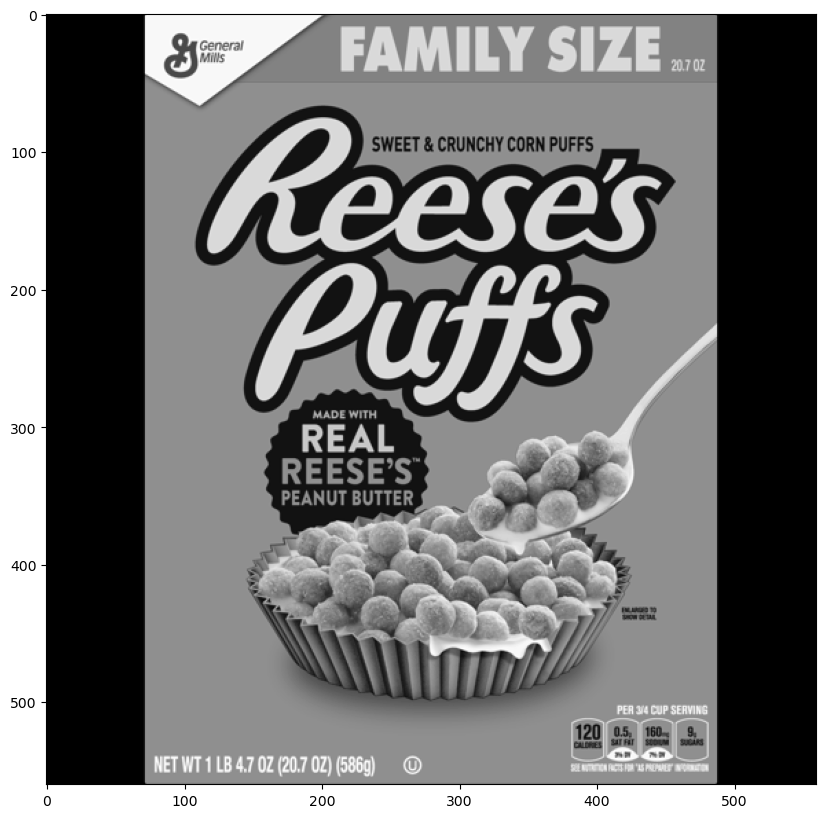

In [3]:
img=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\reeses_puffs.png",0)
display(img)

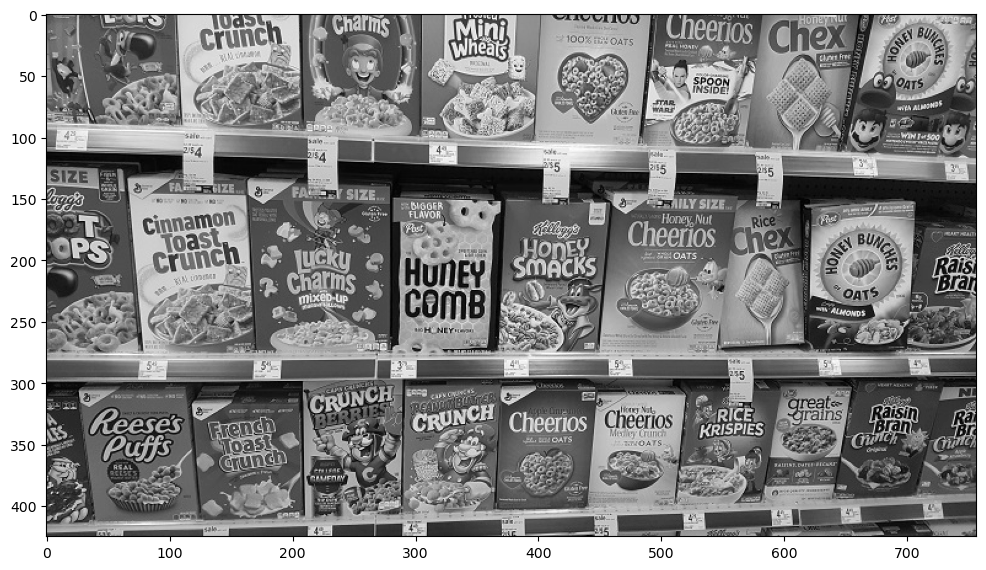

In [8]:
cereals=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\many_cereals.jpg",0)
display(cereals)  #kaba kuvvet eşleştiricisi

In [9]:
#çoğunun üstünde aile boyu yazıyor family size buna göre bi çekme işlemi yapabiliriz
#yani eşleşmeler varsa bulunursa filtreleme işlemi yapılacak ilk yapılacak ARB tanımlıyıcıları 
#ile kaba kuvvet tespiti olarak yani ilk dedektör oluşturacağız 
orb=cv2.ORB_create() #bu nesnenin kilit noktalarını ve tanımlayıcıları bulmaktı 

In [13]:
kp,des=orb.detectAndCompute(img,mask=None)

In [12]:
kp1,des1=orb.detectAndCompute(cereals,mask=None)#keypoint  kaydırma sekmesi kilit noktaları alır ve 
#tanımlıyıcıları hesaplarız
#özellikleri algılar ve algoritma nesnesi oluşturur 

In [ ]:
Bu metod, anahtar noktaların tespiti (detect) ve bu noktaların özniteliklerinin hesaplanması (compute) 
işlemlerini aynı anda gerçekleştirir.
ORB (Oriented FAST and Rotated BRIEF), görüntüdeki ilginç bölgeleri tespit eden ve bu bölgelerin
karakteristik özelliklerini çıkaran bir algoritmadır.
Özellikle hızlı ve etkin olmasıyla bilinir.

kp: Anahtar noktalar (keypoints). Bu noktalar, görüntüdeki önemli bölgeleri temsil eder. 
    Genellikle bu bölgeler, köşeler ya da belirgin yapılar olur. Her bir anahtar nokta,
    pozisyon (x, y) ve ölçek gibi bilgileri içerir.
    
des: Öznitelik tanımlayıcıları (descriptors). Anahtar noktaların etrafındaki bölgenin öznitelik 
    vektörleridir. Bu öznitelikler, görüntüdeki bu noktaları eşleştirme veya tanıma amacıyla
    kullanılır. ORB, BRIEF tabanlı bir tanımlayıcı kullanarak bu öznitelikleri oluşturur.

In [14]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [16]:
matches=bf.match(des,des1)

In [17]:
singlematch=matches[0]

In [18]:
singlematch.distance #ilk tahmini çektik 

56.0

In [ ]:
singlematch.distance çıktısının 56 olması, iki öznitelik tanımlayıcı (descriptor) arasındaki mesafenin
56 olduğu anlamına gelir. Bu mesafe, iki tanımlayıcı arasındaki benzerliğin bir ölçüsüdür.
Genellikle şu şekilde yorumlanır:

Küçük mesafeler (örneğin 0-50 arası), iki öznitelik tanımlayıcı arasındaki benzerliğin yüksek olduğunu gösterir. Yani iki noktanın birbirine çok benzediğini ifade eder.
Büyük mesafeler (örneğin 100 ve üzeri), tanımlayıcılar arasındaki farkın büyük olduğunu ve benzerliklerinin düşük olduğunu gösterir.
Bu bağlamda, mesafenin 56 olması orta derecede bir eşleşme anlamına gelir. Bu eşleşmenin iyi olup olmadığı, kullanılan uygulamanın amacına ve eşleşme koşullarına bağlıdır.

Eşleşmenin İyi Olup Olmadığını Değerlendirme:
Kullanılan Eşik Değeri: Uygulamada genellikle bir eşik değeri belirlenir. Örneğin, mesafe 50'den küçükse eşleşme "iyi", 100'den büyükse "kötü" olarak kabul edilebilir. Bu değeri kendiniz ayarlayabilirsiniz.

Bağıl Mesafeler: Tek bir mesafe değerine bakmak yerine, diğer eşleşmelerin mesafeleriyle kıyaslamak daha iyi olur. Eğer diğer eşleşmelere kıyasla mesafe daha küçükse, bu daha anlamlı bir eşleşme olabilir.

Uygulama Bağlamı: Eğer çok hassas bir eşleşme arıyorsanız, daha küçük mesafeler tercih edilebilir. Ancak, nesne tanıma gibi daha genel uygulamalarda 56 mesafesi kabul edilebilir düzeyde olabilir.

Öneri:
Eğer birçok eşleşme varsa, iyi eşleşmeleri belirlemek için bir eşik değer kullanabilir veya en iyi eşleşmeleri bulmak için k-en iyi eşleşme yaklaşımını (k-NN) uygulayabilirsiniz.
Özetle, 56 mesafe değeri ortalama bir eşleşme anlamına gelir. İyi olup olmadığını değerlendirmek için uygulamanızda ne kadar hassasiyet istediğinize ve diğer eşleşmelerin mesafelerine bakmanız faydalı olacaktır.

In [25]:
matches=sorted(matches,key=lambda x:x.distance)

In [20]:
len(matches)

139

In [27]:
reesesmaches=cv2.drawMatches(img,kp,cereals,kp1,matches[:25],None,flags=2) #en iyi 25 eşleşme al

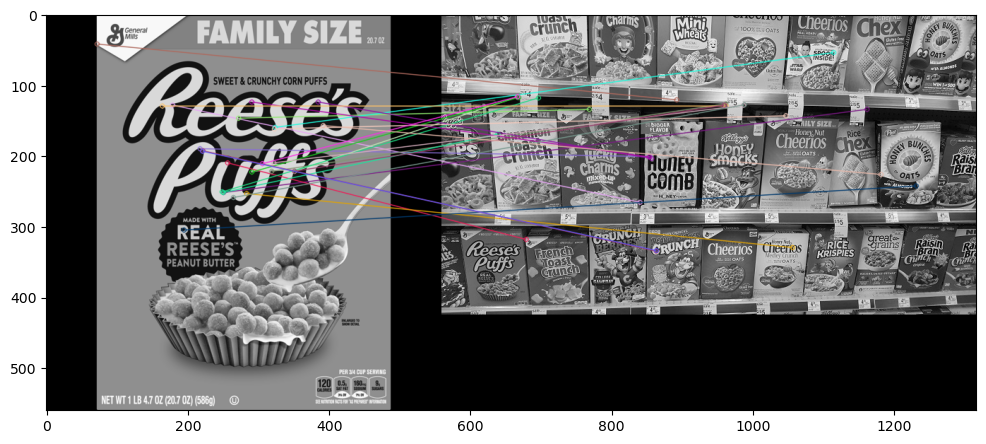

In [28]:
display(reesesmaches)

In [35]:
sift=cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(img,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [37]:
bf=cv2.BFMatcher()

In [38]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [39]:
matches=bf.knnMatch(des1,des2,k=2)# en iyi değerler için 2 aratma yapar 

In [40]:
matches #ilk maç 2.maçtan daha iyidir 

((< cv2.DMatch 0000014719CBE790>, < cv2.DMatch 000001471A0B0F90>),
 (< cv2.DMatch 000001471A0B0ED0>, < cv2.DMatch 000001471A0B0D90>),
 (< cv2.DMatch 000001471A0B0E70>, < cv2.DMatch 000001471A0B0B30>),
 (< cv2.DMatch 000001471A0B0D50>, < cv2.DMatch 000001471A0B0EF0>),
 (< cv2.DMatch 000001471A0B0E50>, < cv2.DMatch 000001471A0B0CD0>),
 (< cv2.DMatch 000001471A0B0D70>, < cv2.DMatch 000001471A0B0DF0>),
 (< cv2.DMatch 000001471A0B0E10>, < cv2.DMatch 000001471A0B09F0>),
 (< cv2.DMatch 000001471A0B0E90>, < cv2.DMatch 000001471A0B0DD0>),
 (< cv2.DMatch 000001471A0B0F50>, < cv2.DMatch 000001471A0B0F30>),
 (< cv2.DMatch 000001471A0B0E30>, < cv2.DMatch 000001471A0B0FB0>),
 (< cv2.DMatch 000001471A0B0FD0>, < cv2.DMatch 000001471A0B0FF0>),
 (< cv2.DMatch 000001471A0B1010>, < cv2.DMatch 000001471A0B1030>),
 (< cv2.DMatch 000001471A0B1050>, < cv2.DMatch 000001471A0B1070>),
 (< cv2.DMatch 000001471A0B1090>, < cv2.DMatch 000001471A0B10B0>),
 (< cv2.DMatch 000001471A0B10D0>, < cv2.DMatch 000001471A0B10F

In [42]:
good=[] #ilk maç mesafe %75den azsa o zaman iyi bir eşleşme var gibi    mesafe uzunsa kötü yakınsa iyidir 

for match1,match2 in matches:
    if match1.distance <0.75*match2.distance:
        good.append([match1])

In [43]:
good

[[< cv2.DMatch 0000014719CBE790>],
 [< cv2.DMatch 000001471A0B19D0>],
 [< cv2.DMatch 000001471A0B1F90>],
 [< cv2.DMatch 000001471A0B1FD0>],
 [< cv2.DMatch 000001471A0B21D0>],
 [< cv2.DMatch 000001471A0B27D0>],
 [< cv2.DMatch 000001471A0B2AD0>],
 [< cv2.DMatch 000001471A0B2C50>],
 [< cv2.DMatch 000001471A0B2FD0>],
 [< cv2.DMatch 000001471A0B3210>],
 [< cv2.DMatch 000001471A0B35D0>],
 [< cv2.DMatch 000001471A0B36D0>],
 [< cv2.DMatch 000001471E12C990>],
 [< cv2.DMatch 000001471E12C9D0>],
 [< cv2.DMatch 000001471E12CAD0>],
 [< cv2.DMatch 000001471E12D850>],
 [< cv2.DMatch 000001471E12E1D0>],
 [< cv2.DMatch 000001471E12E290>],
 [< cv2.DMatch 000001471E12E350>],
 [< cv2.DMatch 000001471E12EBD0>],
 [< cv2.DMatch 000001471E12ED10>],
 [< cv2.DMatch 000001471E12FE10>],
 [< cv2.DMatch 000001471E12FF50>],
 [< cv2.DMatch 000001471E12FF90>],
 [< cv2.DMatch 000001471E130190>],
 [< cv2.DMatch 000001471E1301D0>],
 [< cv2.DMatch 000001471E1313D0>],
 [< cv2.DMatch 000001471E131550>],
 [< cv2.DMatch 00000

In [44]:
len(good)

79

In [45]:
len(matches)

1501

In [47]:
sift_matches=cv2.drawMatchesKnn(img,kp,cereals,kp1,good,None,flags=2)

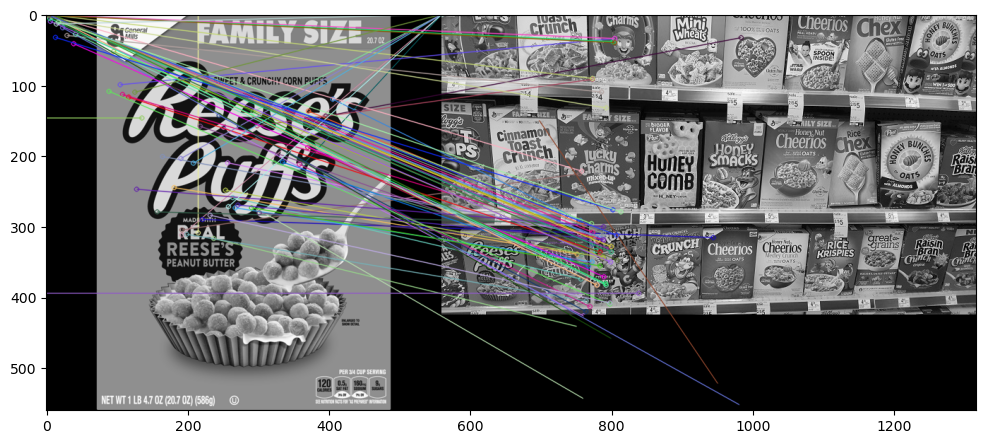

In [48]:
display(sift_matches)  #hedef imajda family size  bunu bulamaya çalışcaz

In [49]:
sift=cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(img,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [ ]:
#FLAAN
#şimdiki durumda yapacağımız şey artık maçların hassasiyeti ve kalitesini arttırmaya çalışmak için gösteriliecek planlar
#ve parametreler onayabilirz flaan kaba kuvvetten çok daha hızlı ama en yakın komşuları bulur bu iyi eşleşmede ama
#en iyisi olması gerekemz 

In [52]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  #endeks ağacı  gölge ağacı  5 eşit ağaç
#hızlı arama içindir bu ,büyük ve çok sayıda görüntü varsa 

In [ ]:
FLANN, özellikle yüksek boyutlu verilerde hızlı ve etkili bir şekilde benzerlik araması yapmak için kullanılır.
Genellikle SIFT, SURF gibi öznitelik tanımlayıcılarıyla birlikte kullanılır.

Kodun detaylı açıklaması şöyle:

1. FLANN_INDEX_KDTREE = 0
Bu satır, hangi arama algoritmasının kullanılacağını belirlemek için bir sabit tanımlar.

FLANN_INDEX_KDTREE = 0: FLANN kütüphanesindeki KD-Tree algoritmasını seçer.
KD-Tree, çok boyutlu verilerde en yakın komşu arama yapmak için kullanılan bir veri yapısıdır.
FLANN kütüphanesi, çeşitli algoritmalar arasında seçim yapmanıza izin verir. Bu parametre ile hangi algoritmanın kullanılacağını belirlemiş oluyorsunuz.
SIFT ve SURF gibi sürekli (floating-point) öznitelik tanımlayıcılarıyla çalışırken, KD-Tree genellikle en uygun seçimdir.
2. index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
Bu satır, FLANN algoritmasının kullanılacak yapılandırmasını belirler ve index_params sözlüğü içerisine koyar.

algorithm = FLANN_INDEX_KDTREE: Yukarıda tanımlanan KD-Tree algoritmasını kullanacağımızı belirtir.
trees = 5: KD-Tree algoritması için oluşturulacak ağaç sayısını belirler. Daha fazla ağaç, daha doğru sonuçlar sağlar,
    ancak arama süresini artırabilir. Genellikle 4-5 ağaç yeterli olur.
Bu parametreler, KD-Tree'nin yapılandırmasını ve performansını etkiler.

3. search_params = dict(checks=50)
Bu satır, FLANN aramasında kullanılan arama parametrelerini ayarlamak için bir sözlük oluşturur.

checks=50: Yakın komşu araması yapılırken kaç aday komşunun kontrol edileceğini belirtir.
Yüksek bir değer daha hassas sonuçlar verir, ancak daha fazla hesaplama gücü gerektirir.
50 gibi orta düzey bir değer, hem hız hem de doğruluk arasında bir denge sağlar.

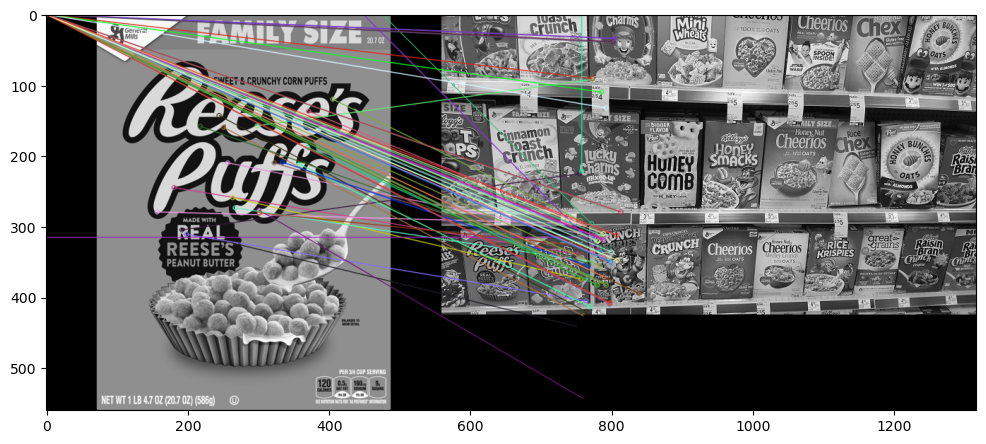

In [53]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(img,kp,cereals,kp1,good,None,flags=2)

display(flann_matches)